<a href="https://colab.research.google.com/github/Ayushi286/Ayushi286/blob/main/Admission_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Admission_Predict.csv to Admission_Predict (2).csv


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [ ]:
df = pd.read_csv("Admission_Predict.csv")
df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
#initial exploration
print(df.head())
print(df.info())
print(df.describe())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   Universi

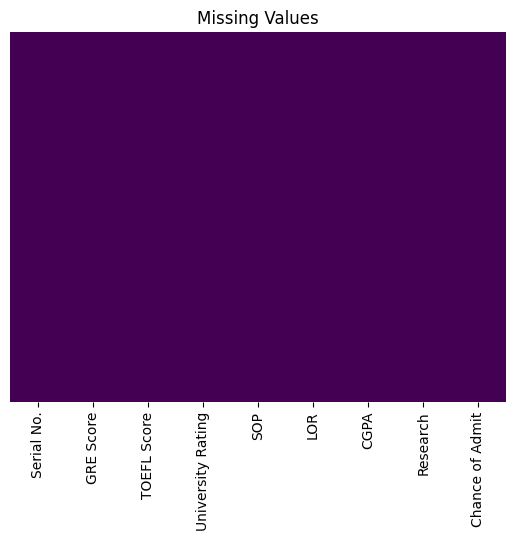

In [ ]:
# 4. Check Missing Data
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values")
plt.show()

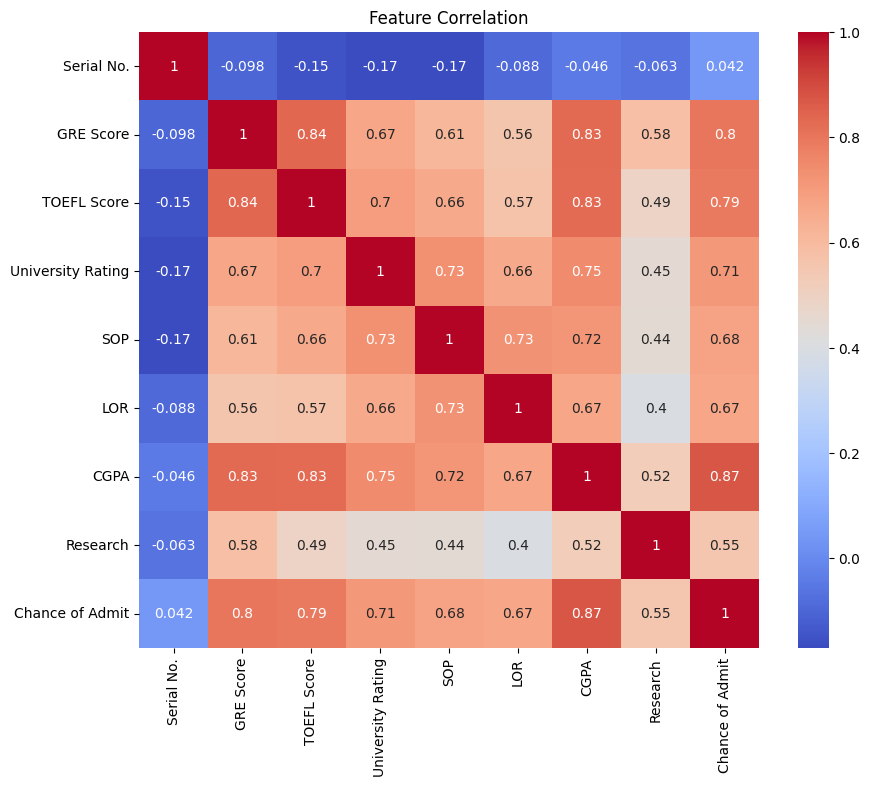

In [ ]:
 #Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [ ]:
# Clean column names (removes extra spaces)
df.rename(columns=lambda x: x.strip(), inplace=True)

X = df.drop(columns=["Chance of Admit", "Serial No."])
y = df["Chance of Admit"]


In [ ]:
#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, lr_preds))


Linear Regression R2 Score: 0.8212082591486993


In [ ]:
#  Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, rf_preds))


Random Forest R2 Score: 0.8066077140670239


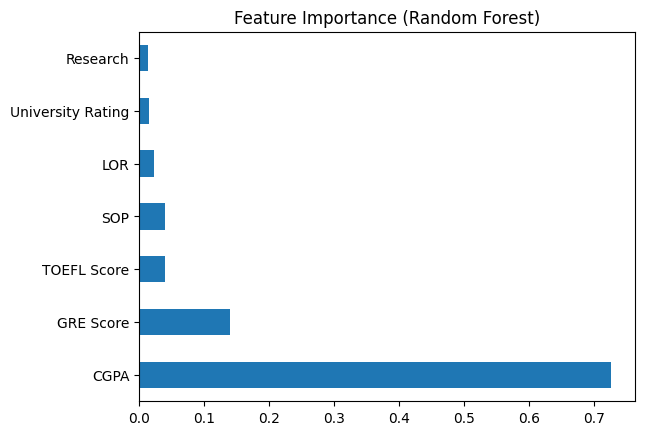

In [ ]:
#  Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()